In [1]:
import serial, time, numpy as np, numba
from matplotlib import pyplot as plt


In [2]:
s = serial.Serial('COM6', 115200)

In [3]:
def get_information(information_line : str):
    x, y, v = information_line.split(',') #get the angleX, angleY, and voltage separately
    angleX = float(x[7:])
    angleY = float(y[7:])
    voltage = float(v.strip()[8:])

    return angleX, angleY, voltage
    

In [4]:
samples_to_get = 10000
angleX = np.zeros(shape = (samples_to_get), dtype = np.float32)
angleY = np.zeros(shape = (samples_to_get), dtype = np.float32)
voltage = np.zeros(shape = (samples_to_get), dtype = np.float32)

i = 0
while i < samples_to_get:
    try:
        angleX[i], angleY[i], voltage[i] = get_information(s.readline().decode())
    except:
        continue
    if(i % 1000 == 0):
        print(i)
        
    time.sleep(1/1000)
    i+=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


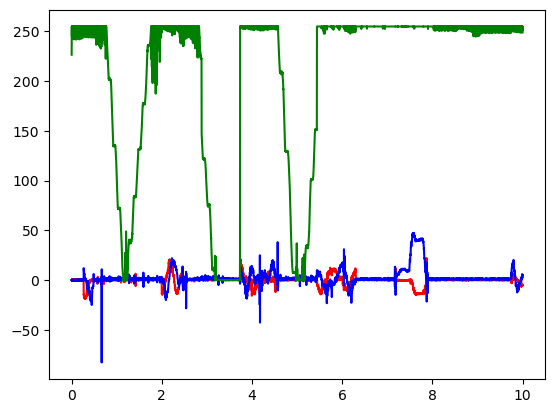

In [5]:
t = np.linspace(0, 10, samples_to_get)

plt.plot(t, angleX, 'r-', label = 'Angle X')
plt.plot(t, angleY, 'b-', label = 'Angle Y')
plt.plot(t, voltage, 'g-', label = 'Voltage')
plt.show()

In [27]:
from scipy import fft

fft_angle_x = fft.fft(angleX)
fftfrequency = fft.fftfreq(len(angleX), 1/1000)
mag_angle_x = abs(fft_angle_x)

fft_angle_y = fft.fft(angleY)
fftfrequency = fft.fftfreq(len(angleY), 1/1000)
mag_angle_y = abs(fft_angle_y)

fft_voltage = fft.fft(voltage)
fftfrequency = fft.fftfreq(len(voltage), 1/1000)
mag_voltage = abs(fft_voltage)


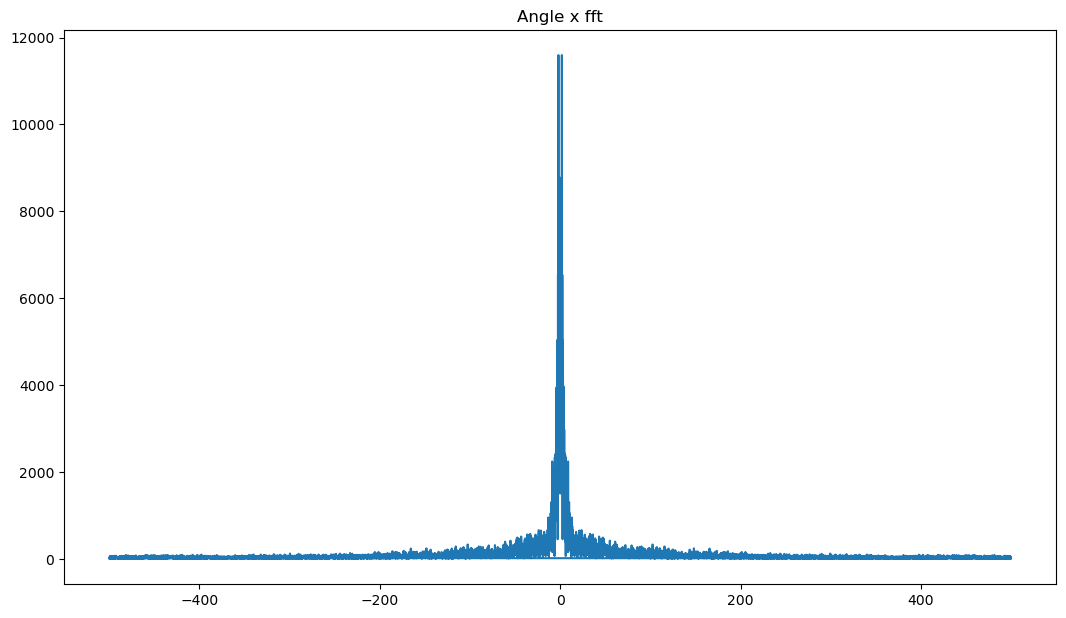

In [33]:
plt.figure(figsize = (12.8, 7.2))
plt.title('Angle x fft')
plt.plot(fftfrequency, mag_angle_x)
plt.show()

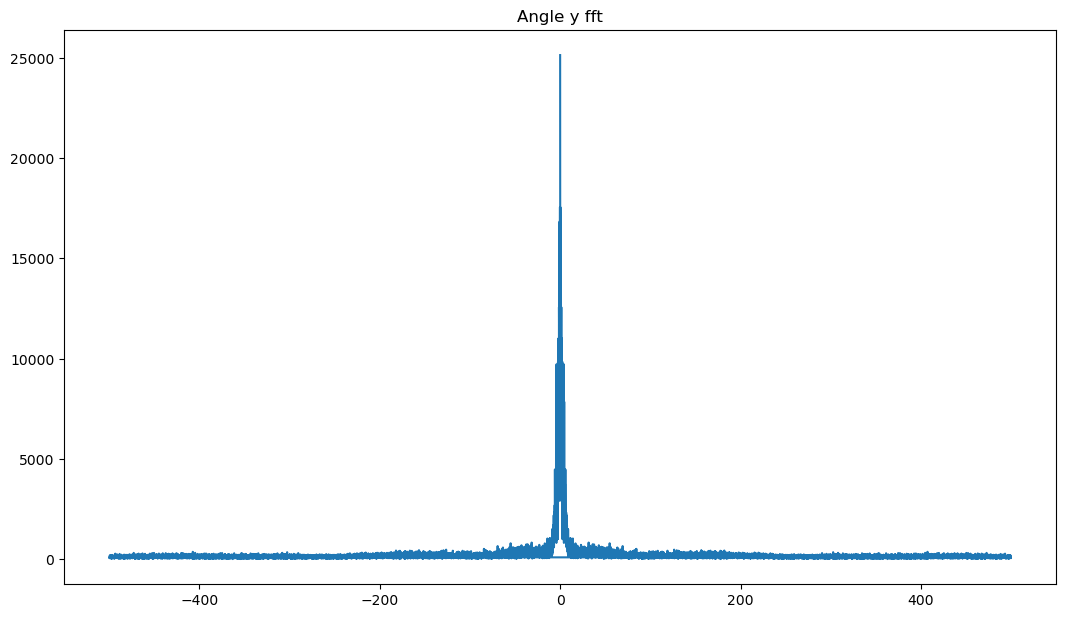

In [34]:
plt.figure(figsize = (12.8, 7.2))
plt.title('Angle y fft')
plt.plot(fftfrequency, mag_angle_y)
plt.show()

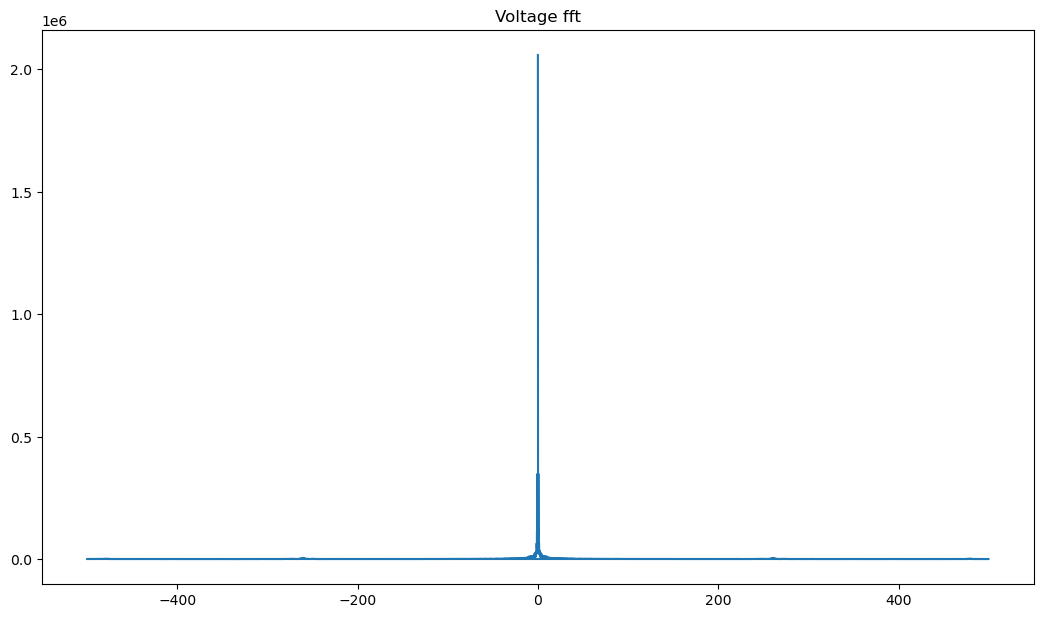

In [35]:
plt.figure(figsize = (12.8, 7.2))
plt.title('Voltage fft')
plt.plot(fftfrequency, mag_voltage)
plt.show()